In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle

In [2]:
D = pickle.load(open("L4/RegressData001.p", 'rb'))

In [3]:
x = D['x']
y = D['y']

print(x.shape)
print(y.shape)

(1, 500)
(1, 500)


(-5.497460489643618, 5.471832742331873, -8.496089838309345, 4.220985477782581)

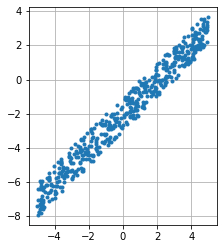

In [6]:
plt.plot(x.T, y.T, '.')
plt.grid(True)
plt.axis('scaled')

In [10]:
X = np.vstack((np.ones(500), x))

print(X.shape)

(2, 500)


In [11]:
Rx = np.dot(X, X.T)

print(Rx)

[[ 500.           41.38560121]
 [  41.38560121 4399.93141709]]


In [13]:
rxy = np.dot(X, y.T)

print(rxy)

[[-965.68232012]
 [4304.64981802]]


In [15]:
w = np.dot(la.inv(Rx), rxy)

print(w)

[[-2.01391133]
 [ 0.99728753]]


(-5.497460489643618, 5.471832742331873, -8.496089838309345, 4.220985477782581)

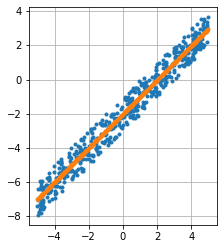

In [18]:
ye = np.dot(w.T, X)

plt.plot(x.T, y.T, '.')
plt.plot(x.T, ye.T, '.')
plt.grid(True)
plt.axis('scaled')

In [19]:
my = np.mean(y)

print(my)

-1.9313646402398437


In [20]:
vy = np.sum((y - my) ** 2)

print(vy)

4529.156952193196


In [21]:
pe = np.sum((y - ye) ** 2)

print(pe)

156.46947650808306


In [22]:
R2 = 1 - pe/vy

print(R2)

0.965452847371007


(-5.497460489643618,
 5.471832742331873,
 -1.0855590891023918,
 1.0985049187290004)

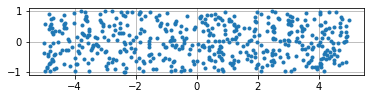

In [26]:
e = y - ye

plt.plot(x.T, e.T, '.')
plt.grid(True)
plt.axis('scaled')

### Slide 10

In [28]:
D = pickle.load(open("L4/RegressData002.p", 'rb'))

In [29]:
x = D['x']
y = D['y']

print(x.shape)
print(y.shape)

(1, 1500)
(1, 1500)


In [31]:
X = np.vstack((np.ones(1500), x, x ** 2, x ** 3))
Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.inv(Rx), rxy)

print(w)

[[ 2.01160905]
 [-0.98245165]
 [-0.51315283]
 [ 0.11294984]]


(-2.3486415225739474, 5.339085695924003, -4.211938946882598, 3.757444574752356)

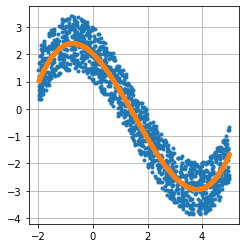

In [32]:
ye = np.dot(w.T, X)

plt.plot(x.T, y.T, '.')
plt.plot(x.T, ye.T, '.')
plt.grid(True)
plt.axis('scaled')

(-2.3486415225739474, 5.339085695924003, -1.120456512792582, 1.181465937098137)

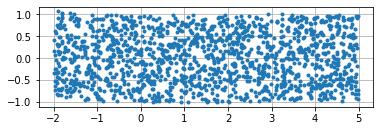

In [33]:
e = y - ye

plt.plot(x.T, e.T, '.')
plt.grid(True)
plt.axis('scaled')

In [35]:
my = np.mean(y)
vy = np.sum((y-my) ** 2)
pe = np.sum((y - ye) ** 2)
R2b = 1 - pe/vy

print(R2b)

0.9255804391025634


## Slide 15 (California Housing)

In [37]:
import sklearn.datasets as dt

In [38]:
D = dt.load_diabetes()
print(D.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [45]:
X = D.data

print(X.shape)

(442, 10)


In [41]:
y = D.target

print(y.shape)

(442,)


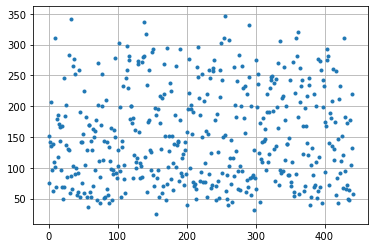

In [43]:
plt.plot(y, '.')
plt.grid(True)

In [46]:
from sklearn.model_selection import train_test_split

In [52]:
X1, X2, y1, y2 = train_test_split(X,y, test_size = 1/3, random_state=42)

In [53]:
print(X1.shape)

(294, 10)


In [51]:
X1n = np.vstack((np.ones(294), X1.T))

print(X1n.shape)

(11, 294)


In [54]:
print(X2.shape)

(148, 10)


In [55]:
X2n = np.vstack((np.ones(148), X2.T))

print(X2n.shape)

(11, 148)


In [60]:
Rx = np.dot(X1n, X1n.T)
rxy = np.dot(X1n, y1.T)
w = np.dot(la.inv(Rx), rxy)

print(w)

[ 150.47049262   32.13748432 -243.77664914  560.31940763  406.14758842
 -715.96522268  394.56152801    9.53622036  172.52108753  626.90625489
  -21.0585317 ]


In [63]:
y2e = np.dot(w.T, X2n)

print(y2e.shape)

(148,)


In [64]:
my = np.mean(y2)
vy = np.sum((y2-my) ** 2)
pe = np.sum((y2 - y2e) ** 2)
e = y2 - y2e
R2 = 1 - pe/vy

print(R2)

0.5117102697963469


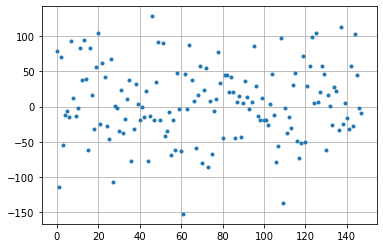

In [69]:
plt.plot(e, '.')
plt.grid(True)

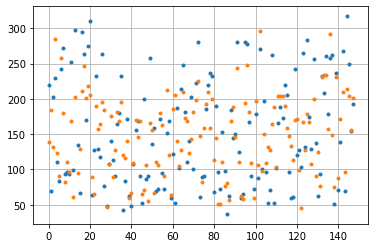

In [73]:
plt.plot(y2, '.')
plt.plot(y2e, '.')
plt.grid(True)

(23.0, 331.0, 33.540103213123395, 308.7855515774366)

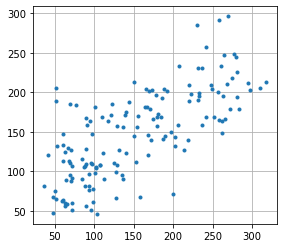

In [71]:
plt.plot(y2, y2e, '.')
plt.grid(True)
plt.axis('scaled')

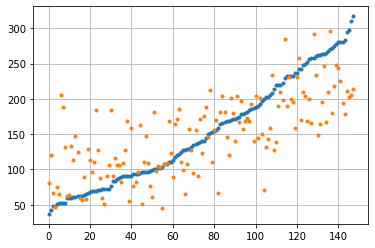

In [75]:
idx = np.argsort(y2)

plt.plot(y2[idx], '.')
plt.plot(y2e[idx], '.')
plt.grid(True)

In [76]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression().fit(X1, y1)

In [81]:
print(R2)
print(lr.score(X2, y2))

0.5117102697963469
0.5117102697963467


In [86]:
print(w[0])
print(lr.intercept_) # -> O w0
print()
print(w[1:])
print(lr.coef_) # -> Todos menos o w0

150.47049261988212
150.47049261988215

[  32.13748432 -243.77664914  560.31940763  406.14758842 -715.96522268
  394.56152801    9.53622036  172.52108753  626.90625489  -21.0585317 ]
[  32.13748432 -243.77664914  560.31940763  406.14758842 -715.96522268
  394.56152801    9.53622036  172.52108753  626.90625489  -21.0585317 ]


In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
pf = PolynomialFeatures(degree=2).fit(X1, y1)
X1p = pf.transform(X1)

In [89]:
print(X1.shape)
print(X1p.shape)

(294, 10)
(294, 66)


In [91]:
X1p[:5, :3]

array([[ 1.        ,  0.0090156 ,  0.05068012],
       [ 1.        ,  0.03807591,  0.05068012],
       [ 1.        ,  0.02717829,  0.05068012],
       [ 1.        , -0.04183994, -0.04464164],
       [ 1.        ,  0.0090156 , -0.04464164]])

In [92]:
pf = PolynomialFeatures(degree=2, include_bias=False).fit(X1, y1)
X1p = pf.transform(X1)

In [95]:
print(X1.shape)
print(X1p.shape)

(294, 10)
(294, 65)


In [96]:
X1p[:5, :3]

array([[ 0.0090156 ,  0.05068012, -0.00512814],
       [ 0.03807591,  0.05068012, -0.00943939],
       [ 0.02717829,  0.05068012,  0.0250506 ],
       [-0.04183994, -0.04464164,  0.12852056],
       [ 0.0090156 , -0.04464164,  0.01427248]])

In [97]:
lr = LinearRegression().fit(X1p, y1)

In [99]:
X2p = pf.transform(X2)
y2e = lr.predict(X2p)

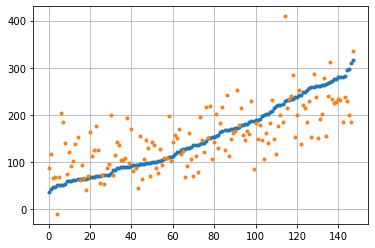

In [100]:
idx = np.argsort(y2)

plt.plot(y2[idx], '.', y2e[idx], '.')
plt.grid(True)

In [102]:
print(lr.score(X2p, y2))
print(lr.score(X1p, y1))

0.4616666114469006
0.5940604781346073


In [103]:
pf = PolynomialFeatures(degree=3, include_bias=False).fit(X1, y1)
X1p = pf.transform(X1)
X2p = pf.transform(X2)

lr = LinearRegression().fit(X1p, y1)
print(lr.score(X1p, y1))
print(lr.score(X2p, y2))

0.9471927808291153
-1466898.186470375


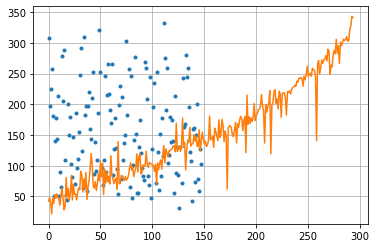

In [104]:
idx1 = np.argsort(y1)
y1e = lr.predict(X1p)

plt.plot(y1[idx], '.')
plt.plot(y1e[idx1])
plt.grid(True)

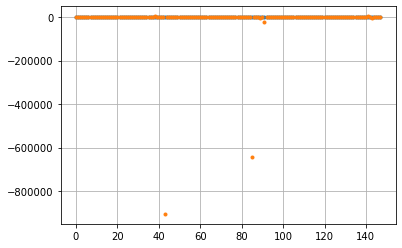

In [106]:
y2e = lr.predict(X2p)

plt.plot(y2[idx], '.')
plt.plot(y2e[idx], '.')
plt.grid(True)

In [107]:
print(X2p.shape)
print(X1p.shape)

(148, 285)
(294, 285)


In [108]:
print(lr.coef_[:10])

[-1.07193966e+14 -1.25278500e+05 -9.55692500e+04 -3.89755000e+04
 -8.01738855e+08  7.04016812e+08  2.99154204e+08 -1.20890000e+05
  3.43427069e+08  2.15988000e+05]


In [109]:
from sklearn.linear_model import Ridge, Lasso

In [110]:
print(X1p.shape)
print(X2p.shape)

(294, 285)
(148, 285)


In [112]:
rd = Ridge().fit(X1p, y1)

print(rd.score(X2p, y2))
print(rd.score(X1p, y1))

0.44574123257624076
0.40637859820213307


In [114]:
rd = Ridge(alpha=0.5).fit(X1p, y1)

print(rd.score(X2p, y2))
print(rd.score(X1p, y1))

0.4912330359292686
0.45955134281650023


In [115]:
rd = Ridge(alpha=0.25).fit(X1p, y1)

print(rd.score(X2p, y2))
print(rd.score(X1p, y1))

0.5108598437515385
0.4892513407914084


In [116]:
print(rd.coef_)

[ 4.17323286e+01 -1.53832142e+02  4.40903319e+02  3.09795404e+02
 -5.20245059e+01 -6.68337874e+01 -2.02846758e+02  1.20395355e+02
  2.95656318e+02  5.74629760e+01  1.65724814e+01  2.04382242e+01
  4.13615025e+00  1.63069023e+01  1.52046671e-01 -3.72410209e+00
 -6.97101870e+00  9.36007263e+00  1.42922903e+01  1.17195782e+01
 -9.28912658e-01  9.67219079e+00  1.53981555e+01  5.35300353e+00
  1.86183585e+00 -1.36615478e+00  4.53792003e+00  9.60926913e+00
  6.57747243e+00  3.86207458e+01  2.63776509e+01 -7.58992298e+00
 -5.78755860e+00 -1.46851980e+01  9.10407267e+00  9.84730741e+00
  1.99148865e+01  1.92295190e+01  8.31788362e+00  6.32430946e+00
 -4.80551563e+00  7.41395992e+00  1.18358931e+01  8.40303207e+00
  8.13787890e+00  4.33692121e+00  9.38787186e+00 -5.21797842e+00
 -1.33675134e-01  7.28683657e+00 -2.55808506e-02  5.04570074e+00
 -3.88553839e+00  1.09280471e+00  4.85417775e+00  6.06445417e+00
 -1.16622797e+00  6.31312268e+00 -4.76732044e+00  2.70476556e-01
 -4.30291010e+00  9.76957

In [118]:
ls = Lasso().fit(X1p, y1)

print(ls.score(X2p, y2))
print(ls.score(X1p, y1))

0.36455765135675455
0.3435385695816432


In [119]:
print(ls.coef_)

[  0.          -0.         427.943646    71.68492654   0.
   0.          -0.           0.         177.8438869    0.
   0.           0.           0.           0.          -0.
  -0.          -0.           0.           0.           0.
  -0.           0.           0.           0.           0.
  -0.           0.           0.           0.           0.
   0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.           0.
  -0.           0.           0.           0.           0.
   0.          -0.           0.           0.           0.
   0.           0.          -0.          -0.          -0.
  -0.           0.          -0.          -0.           0.
   0.           0.           0.           0.           0.
   0.          -0.           0.           0.           0.
   0.          -0.           0.           0.           0.
   0.           0.          -0.          -0.          -0.
  -0.           0.          -0.          -0.           0.
   0.         

In [120]:
ls = Lasso(alpha=0.5).fit(X1p, y1)

print(ls.score(X2p, y2))
print(ls.score(X1p, y1))

0.4684716876954673
0.4450169316780894


In [122]:
print(ls.coef_)

[  0.          -0.         519.17263796 207.92259043  -0.
  -0.         -90.97693898   0.         274.7462794    0.
   0.           0.           0.           0.          -0.
  -0.          -0.           0.           0.           0.
  -0.           0.           0.           0.           0.
  -0.           0.           0.           0.           0.
   0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.           0.
  -0.           0.           0.           0.           0.
   0.           0.          -0.           0.           0.
  -0.           0.          -0.          -0.           0.
  -0.           0.           0.          -0.           0.
   0.           0.           0.           0.           0.
   0.          -0.           0.           0.          -0.
  -0.          -0.           0.           0.           0.
   0.           0.          -0.          -0.          -0.
  -0.           0.          -0.          -0.           0.
   0.         

In [124]:
ls = Lasso(alpha=0.1).fit(X1p, y1)

print(ls.score(X2p, y2))
print(ls.score(X1p, y1))

0.5120189741551978
0.5012683009350662


In [126]:
print(ls.coef_)

[   0.         -160.48966932  561.44856693  355.31954519  -75.26031329
   -0.         -246.44588236    0.          381.79478976    0.
    0.            0.            0.            0.            0.
    0.           -0.            0.            0.            0.
   -0.            0.            0.            0.            0.
   -0.            0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
    0.            0.            0.            0.            0.
   -0.            0.            0.            0.            0.
    0.            0.           -0.            0.            0.
    0.            0.           -0.            0.            0.
    0.           -0.            0.           -0.            0.
   -0.            0.           -0.            0.            0.
   -0.           -0.           -0.           -0.           -0.
   -0.           -0.           -0.           -0.            0.
    0.            0.           -0.           -0

In [128]:
ls = Lasso(alpha=0.01).fit(X1p, y1)

print(ls.score(X2p, y2))
print(ls.score(X1p, y1))

0.5277434583681628
0.5300642485591951


In [129]:
print(ls.coef_)

[  55.22880892 -240.68162215  530.98276249  390.42307231 -280.12904772
  109.34651171 -214.30243088   50.72723486  475.18909929   -1.88644462
  846.46614219 1360.84975933    0.           85.54705438    0.
   -0.           -0.            0.           42.29682122    0.
   -0.            0.            0.            0.            0.
   -0.            0.            0.            0.          936.96971354
  954.16208996   -0.           -0.           -0.            0.
    0.          181.60455846    0.            0.            0.
   -0.            0.            0.            0.            0.
    0.            0.           -0.            0.            0.
    0.           -0.            0.            0.            0.
  358.1091084    -0.            0.           -0.            0.
   -0.            0.           -0.            0.           67.01866024
   -0.           -0.           -0.           -0.           -0.
    0.            0.           -0.           -0.           -0.
    0.            0.   

In [130]:
print(X.shape)

(442, 10)


In [131]:
print(np.mean(X, axis=0))

[-3.63428493e-16  1.30834257e-16 -8.04534920e-16  1.28165452e-16
 -8.83531559e-17  1.32702421e-16 -4.57464634e-16  3.77730150e-16
 -3.83085422e-16 -3.41288202e-16]


In [132]:
print(np.std(X, axis=0))

[0.04756515 0.04756515 0.04756515 0.04756515 0.04756515 0.04756515
 0.04756515 0.04756515 0.04756515 0.04756515]


In [133]:
Xn = X/0.04756515
print(np.std(Xn, axis=0))

[0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]


In [134]:
X1, X2, y1, y2 = train_test_split(Xn, y, test_size=1/3, random_state=42)

In [135]:
X1p = pf.transform(X1)

print(X1p.shape)

(294, 285)


In [138]:
X2p = pf.transform(X2)

print(X2p.shape)

(148, 285)


In [141]:
ls = Lasso(alpha=0.01).fit(X1p, y1)

C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125847.04957087335, tolerance: 177.91094863945577
  model = cd_fast.enet_coordinate_descent(


In [143]:
print(ls.score(X2p, y2))
print(ls.score(X1p, y1))

-2.324753502795915
0.8607103937792254


In [146]:
ls = Lasso(alpha=0.1).fit(X1p, y1)

C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58564.80389141073, tolerance: 177.91094863945577
  model = cd_fast.enet_coordinate_descent(


In [147]:
print(ls.score(X2p, y2))
print(ls.score(X1p, y1))

-0.5645738679735075
0.812025216126876


### Inicio da aula 22-11

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.linalg as la

In [32]:
D = pickle.load(open('L3/MNISTsmall.p', 'rb'))

In [33]:
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

In [34]:
X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

print(X1.shape)
print(X2.shape)

(784, 10000)
(784, 5000)


In [35]:
X1 = X1[:, (y1==0) | (y1==1)]

print(X1.shape)

(784, 2000)


In [36]:
y1 = y1[(y1==0) | (y1==1)]

print(y1.shape)

(2000,)


In [37]:
X2 = X2[:, (y2==0) | (y2==1)]

print(X2.shape)

(784, 1000)


In [38]:
y2 = y2[(y2==0) | (y2==1)]

print(y2.shape)

(1000,)


In [39]:
print(np.unique(y1))
print(np.unique(y2))

[0. 1.]
[0. 1.]


In [40]:
X1h = np.vstack((np.ones(X1.shape[1]), X1))

print(X1h.shape)

(785, 2000)


In [41]:
X2h = np.vstack((np.ones(X2.shape[1]), X2))

print(X2h.shape)

(785, 1000)


In [42]:
Rx = np.dot(X1h, X1h.T)

print(Rx.shape)

(785, 785)


In [43]:
y1h = y1 * 2 - 1 #Converter (0 a 1) para (-1 a 1)

print(y1h.shape)

(2000,)


In [44]:
rxy = np.dot(X1h, y1h)

In [45]:
w = np.dot(la.pinv(Rx), rxy)

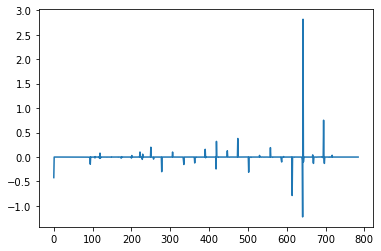

In [46]:
plt.plot(w)

In [47]:
a = w[1:]

print(a.shape)

(784,)


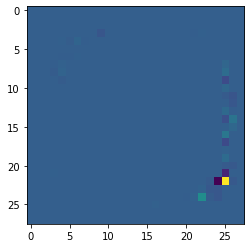

In [48]:
plt.imshow(a.reshape(28, 28))

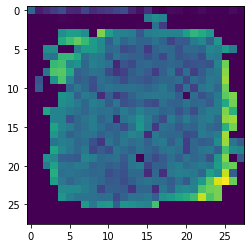

In [66]:
b = np.abs(a)

plt.imshow(np.log10(b+1e-6).reshape(28, 28))

In [50]:
y2b = np.dot(w.T, X2h)

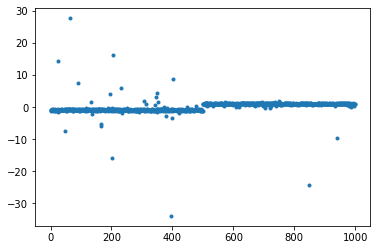

In [51]:
plt.plot(y2b, '.')

In [64]:
y2e = (y2b>=0)*1 #É aqui que é feita realmente a classificação

In [54]:
np.sum(y2 != y2e)

23

In [55]:
from sklearn.metrics import confusion_matrixn_matrix

In [56]:
confusion_matrix(y2, y2e)

array([[484,  16],
       [  7, 493]], dtype=int64)

In [58]:
np.argwhere(y2 != y2e)

array([[ 24],
       [ 63],
       [ 89],
       [134],
       [196],
       [205],
       [232],
       [306],
       [312],
       [343],
       [346],
       [348],
       [353],
       [402],
       [449],
       [478],
       [610],
       [617],
       [705],
       [719],
       [848],
       [941],
       [985]], dtype=int64)

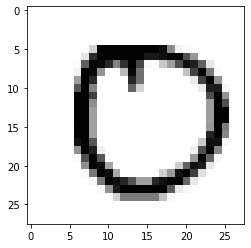

In [60]:
plt.imshow(X2[:, 24].reshape(28, 28), cmap='binary')

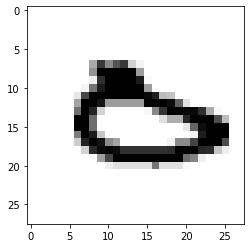

In [61]:
plt.imshow(X2[:, 63].reshape(28, 28), cmap='binary')

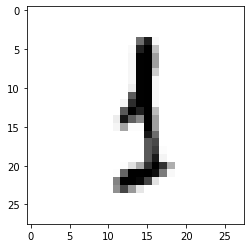

In [62]:
plt.imshow(X2[:, 610].reshape(28, 28), cmap='binary')

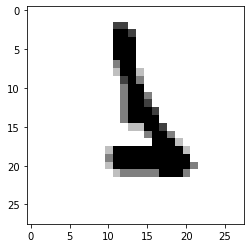

In [63]:
plt.imshow(X2[:, 617].reshape(28, 28), cmap='binary')

## Para 10 Classes

In [69]:
X1 = X[:, f1]
y1 = y[f1]

print(X1.shape)
print(y1.shape)

(784, 10000)
(10000,)


In [71]:
X2 = X[:, f2]
y2 = y[f2]

print(X2.shape)
print(y2.shape)

(784, 5000)
(5000,)


In [72]:
X1h = np.vstack((np.ones(X1.shape[1]), X1))

print(X1.shape)
print(X1h.shape)

(784, 10000)
(785, 10000)


In [75]:
X2h = np.vstack((np.ones(X2.shape[1]), X2))

print(X2.shape)
print(X2h.shape)

(784, 5000)
(785, 5000)


In [76]:
print(np.unique(y1))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [80]:
Y1 = -np.ones((10, X1h.shape[1]))

print(Y1.shape)

(10, 10000)


In [83]:
for i in range(10):
    Y1[i, y1==i] = 1

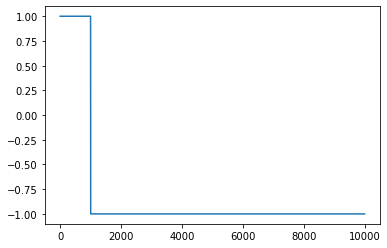

In [84]:
plt.plot(Y1[0, :])

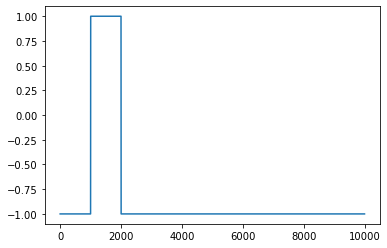

In [85]:
plt.plot(Y1[1, :])

In [91]:
Rx = np.dot(X1h, X1h.T)
rxy = np.dot(X1h, Y1.T)
W = np.dot(la.pinv(Rx), rxy)

print(W.shape)

(785, 10)


In [92]:
Y2e = np.dot(W.T, X2h)

print(Y2e.shape)

(10, 5000)


In [94]:
y2e = np.argmax(Y2e, axis=0)

print(y2e.shape)

(5000,)


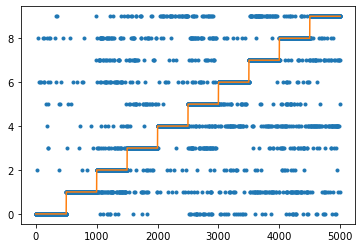

In [98]:
plt.plot(y2e, '.')
plt.plot(y2)

In [99]:
confusion_matrix(y2, y2e)

array([[472,   0,   2,   2,   1,   4,   9,   0,   8,   2],
       [  0, 483,   2,   3,   2,   2,   4,   1,   2,   1],
       [  8,  49, 336,  22,   8,   1,  25,  20,  26,   5],
       [  3,  13,  10, 402,   3,  22,   5,  16,  16,  10],
       [  0,   7,   5,   1, 440,   2,   8,   3,   3,  31],
       [ 20,   9,   3,  40,  21, 337,  11,  13,  30,  16],
       [ 12,  10,  10,   0,  30,  22, 409,   0,   7,   0],
       [  4,  34,   3,   7,  19,   3,   1, 384,   2,  43],
       [ 11,  32,   9,  21,  23,  18,  11,  10, 353,  12],
       [  8,  11,   1,   8,  47,   2,   1,  27,  10, 385]], dtype=int64)

In [100]:
np.sum(y2 != y2e)

999

#### Polinómio 2a Ordem

In [103]:
D = pickle.load(open("L4/QuadDiscData.p", 'rb'))

In [104]:
X = D['data']
y = D['target']

print(X.shape)
print(y.shape)

(2, 1000)
(1000,)


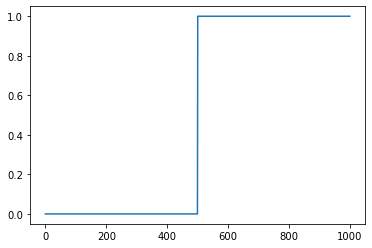

In [105]:
plt.plot(y)

In [110]:
Xh = np.vstack((np.ones(X.shape[1]), X, X**2, X[0, :] * X[1, :]))

print(Xh.shape)

(6, 1000)


In [111]:
Rx = np.dot(Xh, Xh.T)

print(Rx.shape)

(6, 6)


In [115]:
yh = y * 2 - 1 #De (0 a 1) para (-1 a 1)

In [118]:
rxy = np.dot(Xh, yh.T)
w = np.dot(la.pinv(Rx), rxy)

print(w)

[ 0.99166664  0.21316959 -0.47692884 -1.63486434 -1.20408143 -0.44439288]


In [119]:
ye = (np.dot(w.T, Xh) >= 0) * 1

confusion_matrix(y, ye)

array([[474,  26],
       [ 19, 481]], dtype=int64)

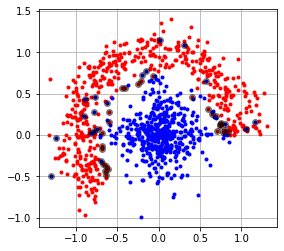

In [120]:
plt.plot(X[0, y==0], X[1, y==0], '.r')
plt.plot(X[0, y==1], X[1, y==1], '.b')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.4)
plt.axis('scaled')
plt.grid(True)

### Para dados a 10 dimensoes

In [122]:
import sklearn.datasets as dt

In [123]:
D = dt.load_diabetes()

X = D.data
print(X.shape)

(442, 10)


In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [126]:
pf = PolynomialFeatures(2).fit(X)
X1 = pf.transform(X) #Isto é só o vstack.

print(X1.shape) 

(442, 66)
